In [1]:
import pandas as pd 
import numpy as np 

from sklearn import preprocessing
from sklearn import metrics

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv("Training_Dataset.csv")

In [3]:
df.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [4]:
df.ix[:,:20].describe()

/home/apoorva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,cm_key,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,20000.50000,1.117150,45507.619525,3.224150,89.264475,906.684950,0.726782,0.167726,1.998524e+06,0.329925,3.384588,11.993125,1.046025,0.329175,1.485472e+03,1.388516e+03,8.541835e+02,9.433976e+02
std,11547.14972,1.656335,86013.548027,2.324337,92.247710,921.135812,1.262927,0.206095,3.838523e+06,0.470191,1.890469,3.274286,0.422328,0.772550,2.509461e+04,9.448546e+04,1.346391e+04,1.515594e+04
min,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000100,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,10000.75000,0.000000,0.000000,2.000000,16.000000,327.000000,0.106000,0.000000,1.267680e+05,0.000000,1.753100,10.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,20000.50000,0.000000,0.000000,3.000000,53.000000,586.000000,0.382000,0.115500,7.368390e+05,0.000000,3.220350,12.000000,1.000000,0.000000,5.708000e+01,2.261500e+01,1.780000e+01,1.332000e+01
75%,30000.25000,2.000000,57736.000000,4.000000,134.000000,1197.000000,0.796900,0.268200,2.918974e+06,1.000000,5.011550,14.000000,1.000000,0.000000,4.011750e+02,2.123700e+02,1.960200e+02,1.801650e+02
max,40000.00000,11.000000,434629.000000,12.000000,355.000000,4830.000000,10.000000,0.883100,3.420702e+07,1.000000,7.001000,23.000000,9.000000,5.000000,3.722901e+06,1.862996e+07,1.845235e+06,1.974546e+06


In [5]:
df.ix[:,20:40].describe()

,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,2.886965e+03,1.754567e+03,1.895592e+03,1.646280e+03,1.158787e+03,1142.080482,1113.819778,1187.048064,406.459045,395.791140,377.963365,392.257667,3.373803e+04,3.638920e+04,3.211148e+04,3.106935e+04,7.921775e+04,4.840110e+04,4.590302e+04,4.625620e+04
std,2.566659e+04,1.543692e+04,2.316176e+04,1.635910e+04,1.105519e+04,9740.096504,9829.297144,10342.186952,2485.528218,2580.799331,2629.362739,2960.379369,2.957924e+05,7.292901e+05,4.881734e+05,5.104114e+05,4.497999e+05,3.085971e+05,2.605690e+05,5.075667e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.764531e+04,-1.175896e+04,-9.355530e+03,-1.018504e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.370382e+03,4.945130e+03,4.336993e+03,3.746507e+03
50%,1.216800e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.945500e+01,68.765000,67.640000,69.105000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.547502e+04,1.473491e+04,1.360194e+04,1.261098e+04
75%,1.240168e+03,6.695200e+02,6.358150e+02,6.096175e+02,4.065750e+02,392.330000,398.950000,400.195000,132.470000,121.215000,95.640000,76.632500,1.567501e+04,1.468443e+04,1.332700e+04,1.239353e+04,6.855096e+04,4.018806e+04,3.869497e+04,3.668335e+04
max,2.311850e+06,1.493318e+06,2.357492e+06,1.451135e+06,1.236260e+06,858207.920000,943117.580000,680432.140000,178685.370000,198075.720000,203538.490000,289805.670000,4.884870e+07,9.996247e+07,8.725604e+07,9.261137e+07,5.410426e+07,3.339069e+07,3.574791e+07,8.716895e+07


In [6]:
Family_size= df["mvar2"].unique()
Family_size

array([ 0,  2,  5,  1,  4,  3,  6,  8,  9, 10, 11,  7])

In [7]:
Total_cards= df["mvar4"].unique()
Total_cards

array([ 4,  6,  1,  3,  0,  5,  2,  8,  7, 12,  9, 10, 11])

In [8]:
#Data not available for income
df["cm_key"][df.mvar9==0].count()

1605

In [9]:
#Data not available for Cosutumer Spending capacity
df["cm_key"][df.mvar3==0].count()

24354

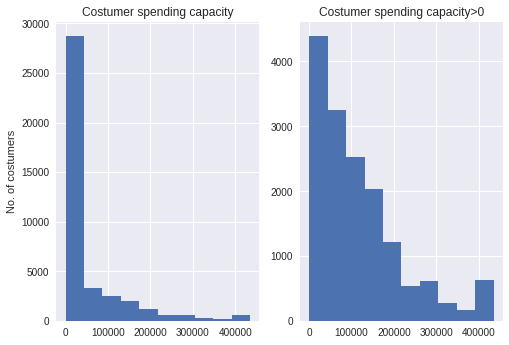

In [10]:
fig, (ax0,ax1) = plt.subplots(1,2,sharex=True)
ax0.hist(df.mvar3)
ax0.set(title='Costumer spending capacity', ylabel='No. of costumers')
ax1.set(title='Costumer spending capacity>0')
ax1.hist(df["mvar3"][df.mvar3>0])
plt.show()

In [11]:
df.ix[:,46:][df.mvar3>0].sum()/df["cm_key"][df.mvar3>0].count()

mvar46    0.423623
mvar47    0.296625
mvar48    0.279752
mvar49    0.081618
mvar50    0.068963
mvar51    0.080148
dtype: float64

In [12]:
df.ix[:,46:][df.mvar3==0].sum()/df["cm_key"][df.mvar3==0].count()

mvar46    0.427240
mvar47    0.288043
mvar48    0.284717
mvar49    0.089102
mvar50    0.064671
mvar51    0.062536
dtype: float64

In [13]:
df.ix[:,46:][df.mvar3>df.mvar3.mean()].sum()/df["cm_key"][df.mvar3>df.mvar3.mean()].count()

mvar46    0.395309
mvar47    0.297700
mvar48    0.306991
mvar49    0.080198
mvar50    0.066125
mvar51    0.083356
dtype: float64

In [14]:
df["mvar12"].unique()

array(['Office supplies    ', 'Unknown            ', 'Misc services      ',
       'Social services    ', 'Manufacturing      ', 'Entertainment      ',
       'Construction       ', 'Apparel', 'Finance            ',
       'Automotive         ', 'Personal services  ', 'Consumables        ',
       'Household          ', 'Transport          ', 'Non durable goods  ',
       'Durable goods      ', 'Produce            ', 'Mining             '], dtype=object)

In [15]:
Industries = pd.crosstab(df.mvar12, [df.mvar49, df.mvar50, df.mvar51])
Industries

mvar49                  0              1
mvar50                  0         1    0
mvar51                  0    1    0    0
mvar12                                  
Apparel               326   19   18   17
Automotive            404   34   37   45
Construction         2391  221  245  347
Consumables           929   96  100   87
Durable goods        1351   87  102  149
Entertainment        1816  172  164  225
Finance              2255  214  180  236
Household            1885  150  164  174
Manufacturing        1430   78  113  187
Mining                 42    2    0   10
Misc services        4253  410  322  455
Non durable goods     803   46   70   88
Office supplies      1698  143  159  197
Personal services    2202  244  217  258
Produce               510   45   56   64
Social services      3308  289  284  353
Transport            1198  122   85  139
Unknown              4321  405  338  416

In [16]:
df.mvar13.unique()

array([12, 11,  6, 13, 10, 15, 14, 16,  7, 18, 17,  8,  9,  5, 22,  0,  4,
       19,  2,  3, 20, 21, 23])

In [17]:
df2= pd.DataFrame(
  {
    "mvar13" : df.mvar13,
    "mvar49" :df.mvar49,
    "mvar50":df.mvar50,
    "mvar51":df.mvar51
})

In [ ]:
sns.pairplot(df2, hue="mvar13")
plt.show()

In [18]:
spend = df.mvar36 + df.mvar37 + df.mvar38 + df.mvar39

In [19]:
income = df["mvar9"][df.mvar9>0]


In [20]:
income= income.sort_values(ascending=True).reset_index()

In [21]:
median_income= income.median()[1]

In [22]:
df.mvar9.replace(to_replace=0, value=median_income, inplace=True)

In [23]:
df2=df
df2.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [24]:
df2.drop(["cm_key", "mvar1", "mvar3"], axis=1, inplace=True)

In [25]:
df2= df2.ix[:, 0:14]

In [26]:
df2["spend"]=spend

In [27]:
df2["supplementary_offered"]= df.mvar46

In [28]:
df2["supplementary"]= df.mvar49

In [29]:
df2.mvar9 = np.log(df2.mvar9)

In [30]:
df2.spend= (df2.spend- df2.spend.mean())/df2.spend.std()

In [31]:
df2.mvar6 = (df2.mvar6- df2.mvar6.mean())/df2.mvar6.std()

In [32]:
le= preprocessing.LabelEncoder()
df2.mvar12= le.fit_transform(df2.mvar12)

In [33]:
df2.describe()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,spend,supplementary_offered,supplementary
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000
mean,1.117150,3.224150,89.264475,-1.227241e-16,0.726782,0.167726,13.465484,0.329925,3.384588,9.967850,11.993125,1.046025,0.329175,1.485472e+03,-1.999845e-16,0.425825,0.086175
std,1.656335,2.324337,92.247710,1.000000e+00,1.262927,0.206095,1.619744,0.470191,1.890469,5.040878,3.274286,0.422328,0.772550,2.509461e+04,1.000000e+00,0.494474,0.280626
min,0.000000,0.000000,1.000000,-9.843119e-01,0.000100,0.000000,4.094345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.669018e-01,0.000000,0.000000
25%,0.000000,2.000000,16.000000,-6.293154e-01,0.106000,0.000000,11.959003,0.000000,1.753100,6.000000,10.000000,1.000000,0.000000,0.000000e+00,-1.462045e-01,0.000000,0.000000
50%,0.000000,3.000000,53.000000,-3.481408e-01,0.382000,0.115500,13.678642,0.000000,3.220350,10.000000,12.000000,1.000000,0.000000,5.708000e+01,-1.125815e-01,0.000000,0.000000
75%,2.000000,4.000000,134.000000,3.151707e-01,0.796900,0.268200,14.886743,1.000000,5.011550,15.000000,14.000000,1.000000,0.000000,4.011750e+02,-2.442707e-02,1.000000,0.000000
max,11.000000,12.000000,355.000000,4.259215e+00,10.000000,0.883100,17.347941,1.000000,7.001000,17.000000,23.000000,9.000000,5.000000,3.722901e+06,1.101513e+02,1.000000,1.000000


In [34]:
df2= df2[df2.supplementary_offered==1]
df2.supplementary.sum()

3447L

In [35]:
df2_majority = df2[df2.supplementary==0]
df2_minority = df2[df2.supplementary==1]
print "majority : " + str(df2_majority.shape)
print "minority : " + str(df2_minority.shape)

majority : (13586, 17)
minority : (3447, 17)


In [36]:
df2_majority_downsampled = resample(df2_majority, 
                                 replace=False,    
                                 n_samples=8000,     
                                 random_state=123)

In [37]:
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,    
                                 n_samples=6000,     
                                 random_state=123)

In [38]:
df3= pd.concat([df2_majority_downsampled, df2_minority_upsampled])
df3.shape

(14000, 17)

In [39]:
train, test= train_test_split(df3, test_size=0.3)

In [40]:
x_train = train.ix[:, :-1]
y_train= train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test= test.ix[:, -1]

/home/apoorva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/home/apoorva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
LR= LogisticRegression()
LR = LR.fit(x_train, y_train)

In [42]:
y_predicted= LR.predict(x_test)

In [43]:
y_predicted.sum()

1048

In [44]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.619523809524
[[1950  396]
 [1202  652]]
             precision    recall  f1-score   support

          0       0.62      0.83      0.71      2346
          1       0.62      0.35      0.45      1854

avg / total       0.62      0.62      0.59      4200



In [85]:
DTC= DecisionTreeClassifier(max_depth=200, class_weight= {0:0.2,1:0.8})

In [86]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='gini',
            max_depth=200, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [87]:
y_predicted= DTC.predict(x_test)

In [88]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.760714285714
[[1726  620]
 [ 385 1469]]
             precision    recall  f1-score   support

          0       0.82      0.74      0.77      2346
          1       0.70      0.79      0.75      1854

avg / total       0.77      0.76      0.76      4200

